In [1]:
# examine the monthly mean spatial distribution of mean omf, and rms
# initial built: 2024/05/30
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.24.1


In [162]:
#avg_period = '2022062000_2022072000'
avg_period = '2022061500_2022081000'

#expids     = ['CTRL','CTRL_no_situ']
expids     = ['full_CTRL','full_CTRL_noinf']
#expids = ['full_CTRL','full_CTRL_noinf','full_only_clr','full_clr_cld','full_sym_tri_clwnbc']

#exptest    = 'CTRL_no_situ'
#expref     = 'CTRL'

#exptest    = 'full_clr_cld'
#expref     = 'full_CTRL'

instr      = 'atms'
channel    = '22'
meshsize   = '5.0'

expshort = {'full_CTRL': 'CTRL', 
            'full_CTRL_noinf': 'NOINF'}

In [171]:
data={};
varbc='omfnbc' # omf (with BC) or omfnbc (without BC)

savefig_dir = f'/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/python_codes/figures/rad_meshplot/{instr}/ch{channel}/'

if varbc == 'omfnbc':
    bc_txt = 'w/o bias correction'
    bc_txt_fn = 'nobc'
else:
    bc_txt = 'w/ bias correction'
    bc_txt_fn = 'bc'

for exp in expids:
    path_dir   = f'/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/gsidiag/ush/radstats/data/meshmean/{exp}/{avg_period}/mesh{meshsize}/'
    fn = path_dir + f'meshmean_ges_{varbc}_{instr}_{channel}_{exp}.npz'
    data[exp] = np.load(fn)

In [172]:
# setup the grid
dx = float(meshsize)
lon = np.arange(0.0+dx*0.5, 360.0+dx*0.5, dx)
lat = np.arange(-90.0+dx*0.5, 90.0+dx*0.5, dx)
lons, lats = np.meshgrid(lon,lat)

In [173]:
# colorscale parameters:
savefig = True

if instr == 'atms':
    if channel in ('16'):
        min_data = 500; val_max  = 4.0;  diff_max = 1.0;    rms_max  = 9;    rmsdiff_max = 0.7
    elif channel in ('17'):
        min_data = 500; val_max  = 5.0;  diff_max = 0.7;    rms_max  = 13;   rmsdiff_max = 0.5
    elif channel in ('18'):
        min_data = 500; val_max  = 4.0;  diff_max = 0.30;   rms_max  = 11;   rmsdiff_max = 0.20
    elif channel in ('19'):
        min_data = 500; val_max  = 3.5;  diff_max = 0.30;   rms_max  = 8.5;  rmsdiff_max = 0.20
    elif channel in ('20'):
        min_data = 500; val_max  = 2.5;  diff_max = 0.25;   rms_max  = 6.5;  rmsdiff_max = 0.20
    elif channel in ('21'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.25;   rms_max  = 4.5;  rmsdiff_max = 0.25
    elif channel in ('22'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.30;   rms_max  = 4.0;  rmsdiff_max = 0.30     
        
        
elif instr == 'amsua':
    if channel in ('1'):
        min_data = 500; val_max  = 3.5;  diff_max = 1.2;   rms_max  = 7;   rmsdiff_max = 0.7
    elif channel in ('2'):
        min_data = 500; val_max  = 5;    diff_max = 1.6;   rms_max  = 12;  rmsdiff_max = 1.2
    elif channel in ('3'):
        min_data = 500; val_max  = 3;    diff_max = 1.0;   rms_max  = 6.0;  rmsdiff_max = 0.6
    elif channel in ('4'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.5;  diff_max = 0.12;  rms_max  = 1.0;  rmsdiff_max = 0.08
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1;  diff_max = 0.12;  rms_max  = 1.4;  rmsdiff_max = 0.08 
    elif channel in ('5'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.2;  diff_max = 0.04;  rms_max  = 0.6;  rmsdiff_max = 0.035
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1;  diff_max = 0.04;  rms_max  = 1.0;  rmsdiff_max = 0.035
            
    elif channel in ('6'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.035; rms_max  = 0.25; rmsdiff_max = 0.015 
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.60; diff_max = 0.035; rms_max  = 1.60; rmsdiff_max = 0.03 

    elif channel in ('7'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.020; rms_max  = 0.30; rmsdiff_max = 0.007
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.50; diff_max = 0.020; rms_max  = 1.60; rmsdiff_max = 0.015  

    elif channel in ('8'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.015; rms_max  = 0.25; rmsdiff_max = 0.007
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.10; diff_max = 0.015; rms_max  = 1.00; rmsdiff_max = 0.010

    elif channel in ('9'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.18; diff_max = 0.025; rms_max  = 0.25; rmsdiff_max = 0.015
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.10; diff_max = 0.025; rms_max  = 1.25; rmsdiff_max = 0.025

    elif channel in ('10'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.20; diff_max = 0.025; rms_max  = 0.30; rmsdiff_max = 0.010
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.20; diff_max = 0.025; rms_max  = 1.40; rmsdiff_max = 0.015
                
    elif channel in ('11'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.35; diff_max = 0.020; rms_max  = 0.50; rmsdiff_max = 0.012
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.25; diff_max = 0.020; rms_max  = 1.25; rmsdiff_max = 0.012

    elif channel in ('12'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.70; diff_max = 0.025; rms_max  = 0.85; rmsdiff_max = 0.018
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.40; diff_max = 0.025; rms_max  = 1.60; rmsdiff_max = 0.018

    elif channel in ('13'):
        if varbc == 'omf':
            min_data = 500; val_max  = 1.20; diff_max = 0.030; rms_max  = 1.60; rmsdiff_max = 0.025
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 2.50; diff_max = 0.030; rms_max  = 3.00; rmsdiff_max = 0.025

    elif channel in ('15'):
        min_data = 500; val_max  = 4.50; diff_max = 1.200; rms_max  = 9.00; rmsdiff_max = 0.8

In [174]:
# mask out pixels with few data points:
mask={};
for exp in expids:
    mask[exp] = data[exp]['ctmesh'] > min_data

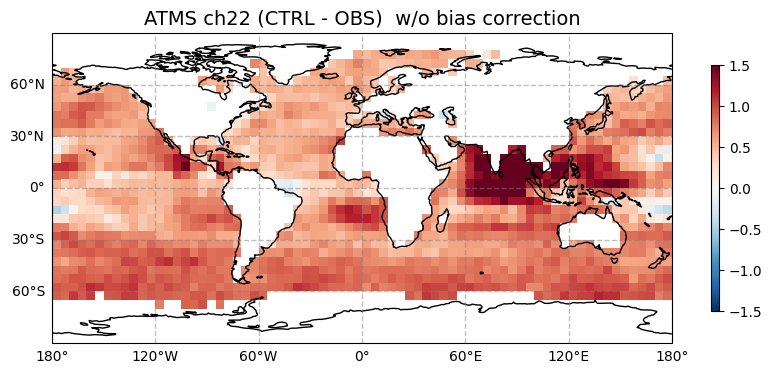

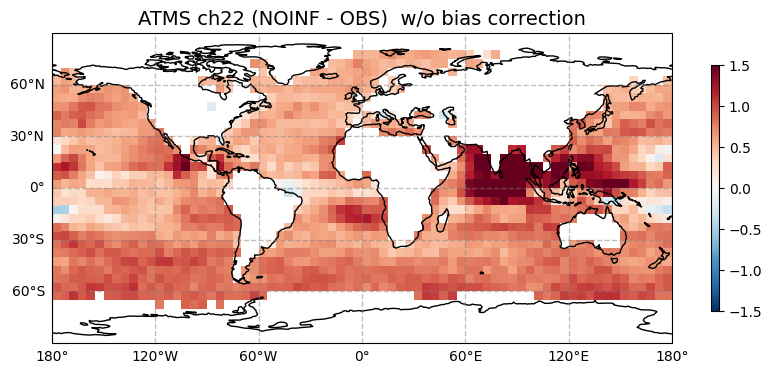

In [175]:
# plot mean omf
for exp in expids:
    pltvar   = -data[exp]['omfmesh']
    pltvar[~mask[exp]] = np.nan

    val_min  = -val_max

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=val_min, vmax=val_max)

    #nan_y, nan_x = np.where(np.isnan(pltvar))
    #ax.scatter(nan_x, nan_y, color='gray', label='NaN values')

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr.upper()} ch{channel} ({expshort[exp]} - OBS)  {bc_txt}',fontsize=14)

    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_OmB_{bc_txt_fn}_{exp}.png', dpi=200, bbox_inches='tight')



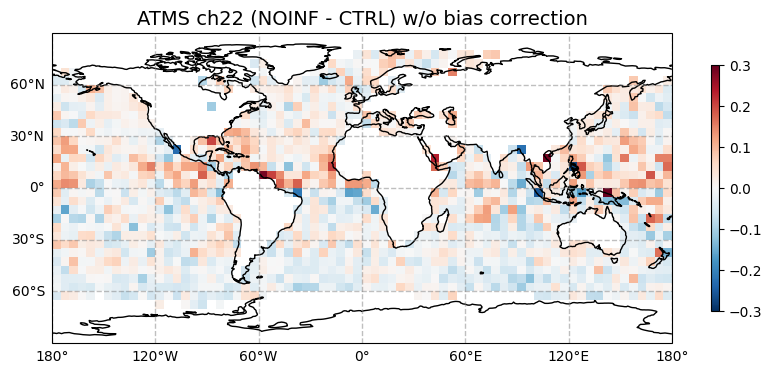

In [176]:
# difference in background (dB)

expref = expids[0]
exp_list = [exp for exp in expids if exp != expref]

for exp in exp_list:

    pltvar = data[expref]['omfmesh'] - data[exp]['omfmesh']
    pltvar[~mask[exp]] = np.nan

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=-diff_max, vmax=diff_max)

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr.upper()} ch{channel} ({expshort[exp]} - {expshort[expref]}) {bc_txt}',fontsize=14)
    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_dB_{bc_txt_fn}_{exp}-{expref}.png', dpi=200, bbox_inches='tight')


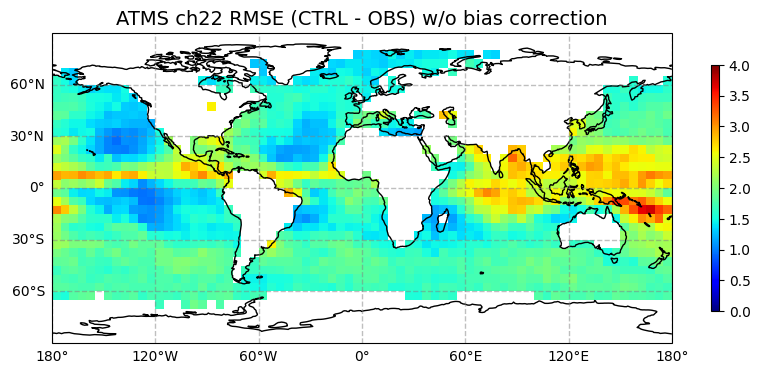

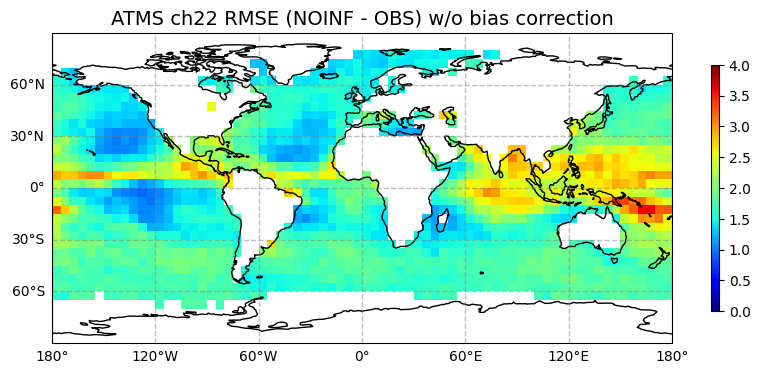

In [177]:
# plot mean rms
for exp in expids:
    pltvar   = data[exp]['rmsmesh']
    pltvar[~mask[exp]] = np.nan

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='jet', vmin=0, vmax=rms_max)

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr.upper()} ch{channel} RMSE ({expshort[exp]} - OBS) {bc_txt}',fontsize=14)
    
    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_RMS_background_{bc_txt_fn}_{exp}.png', dpi=200, bbox_inches='tight')

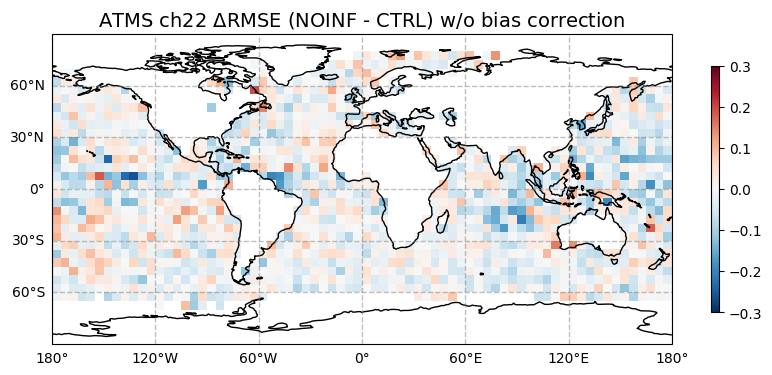

In [178]:
# difference in the rms plot
expref = expids[0]
exp_list = [exp for exp in expids if exp != expref]

for exp in exp_list:
    pltvar = data[exp]['rmsmesh'] - data[expref]['rmsmesh']
    pltvar[~mask[exp]] = np.nan

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=-rmsdiff_max, vmax=rmsdiff_max)

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(rf'{instr.upper()} ch{channel} $\Delta$RMSE ({expshort[exp]} - {expshort[expref]}) {bc_txt}',fontsize=14)

    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_dRMS_background_{bc_txt_fn}_{exp}-{expref}.png', dpi=200, bbox_inches='tight')

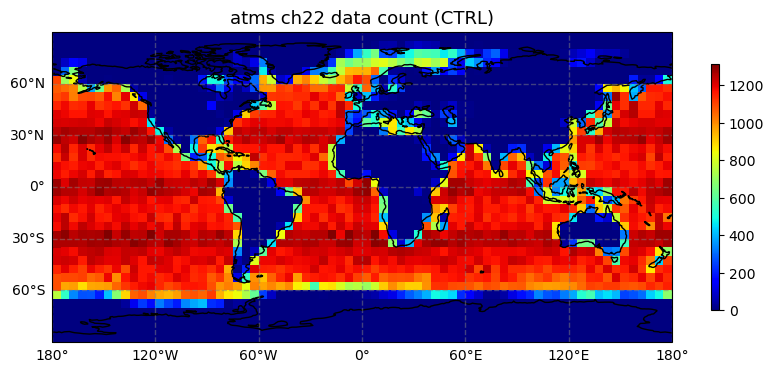

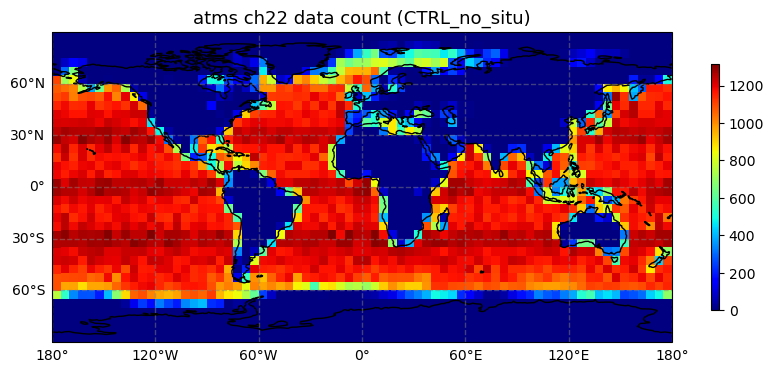

In [134]:
# plot data count
for exp in expids:
    pltvar   = data[exp]['ctmesh']

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='jet', vmin=0)

    #nan_y, nan_x = np.where(np.isnan(pltvar))
    #ax.scatter(nan_x, nan_y, color='gray', label='NaN values')

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr} ch{channel} data count ({exp})',fontsize=13)
    
    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_datacount_{exp}.png', dpi=200, bbox_inches='tight')

In [241]:
data['CTRL']['ctmesh'].min()

0